<a href="https://colab.research.google.com/github/jcvancity2022/Cheng_Jeffrey_rulebased_system/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 2

# Task
Build a program that generates and visualizes L-system patterns using a drawing library like `turtle`. The program should allow for defining L-system grammars with axioms, rules, and angles, generating L-system strings through iteration, and interpreting these strings into graphical commands, including branching, color, and line thickness variations. The system should be able to generate at least three distinct visual patterns by adjusting parameters and using different L-system rules. Finally, save at least five distinct examples of the generated patterns, and create `README.md`, `requirements.txt`, Technical Documentation, and a Creative Statement for the project.

## Initial Setup and L-System Grammar Definition

### Subtask:
Start by importing necessary libraries (e.g., `turtle` for drawing) and define a structure to hold your L-system grammar, including axiom, rules, and angle. We'll implement at least two distinct L-System rules here.


**Reasoning**:
First, import the necessary `turtle` library and define a class to structure the L-system grammar, including axiom, rules, and angle, as per the subtask instructions. Then, instantiate two example L-system grammars within the same code block to demonstrate the structure.



In [106]:
# Generate requirements.txt from Assignment 2 dependencies
requirements = [
    "numpy",
    "matplotlib",
    "svg-turtle",
    "ColabTurtle",
]

with open("requirements.txt", "w", encoding="utf-8") as f:
    f.write("\n".join(requirements) + "\n")

print("requirements.txt written:", requirements)

requirements.txt written: ['numpy', 'matplotlib', 'svg-turtle', 'ColabTurtle']


In [107]:
! pip install ColabTurtle

In [108]:
import ColabTurtle.Turtle as t
from IPython.display import clear_output

In [109]:
import turtle


print("Turtle module imported successfully.")


class LSystemGrammar:
    def __init__(self, axiom, rules, angle):
        self.axiom = axiom
        self.rules = rules
        self.angle = angle

    def __repr__(self):
        return (
            f"LSystemGrammar(axiom='{self.axiom}', "
            f"rules={self.rules}, angle={self.angle}°)"
        )

# -------------------------------------------------
# 1. Dense Fractal Tree (Natural / Vegetation)
# -------------------------------------------------
tree_grammar = LSystemGrammar(
    axiom="F",
    rules={
        "F": "FF-[-F+F+F]+[+F-F-F]",
        "+": "+",
        "-": "-"
    },
    angle=22.5
)

# -------------------------------------------------
# 2. Koch Snowflake (Architectural / Mall Geometry)
# -------------------------------------------------
koch_grammar = LSystemGrammar(
    axiom="F",
    rules={
        "F": "F+F--F+F",
        "+": "+",
        "-": "-"
    },
    angle=60
)

# -------------------------------------------------
# 3. Desert / Resort Grammar (Sparse, Open Space)
# -------------------------------------------------
desert_grammar = LSystemGrammar(
    axiom="F",
    rules={
        "F": "F[+F]F[-F]F",
        "+": "+",
        "-": "-"
    },
    angle=30
)

print("L-system grammars initialized:")
print(f"Tree Grammar:   {tree_grammar}")
print(f"Koch Grammar:   {koch_grammar}")
print(f"Desert Grammar: {desert_grammar}")

Turtle module imported successfully.
L-system grammars initialized:
Tree Grammar:   LSystemGrammar(axiom='F', rules={'F': 'FF-[-F+F+F]+[+F-F-F]', '+': '+', '-': '-'}, angle=22.5°)
Koch Grammar:   LSystemGrammar(axiom='F', rules={'F': 'F+F--F+F', '+': '+', '-': '-'}, angle=60°)
Desert Grammar: LSystemGrammar(axiom='F', rules={'F': 'F[+F]F[-F]F', '+': '+', '-': '-'}, angle=30°)


In [110]:
!pip install svg-turtle


In [111]:
import svg_turtle

svg_screen_width = 800
svg_screen_height = 800

drawing_turtle = svg_turtle.SvgTurtle(svg_screen_width, svg_screen_height)
drawing_turtle.hideturtle()
drawing_turtle.speed(0)


## L-System String Generation Function

### Subtask:
Create a function that takes an axiom, a set of rules, and the number of iterations to generate the expanded L-system string.


**Reasoning**:
I will define the `generate_lsystem_string` function as per the instructions, implementing the iteration logic to expand the L-system string based on the given rules and axiom. Then, I will test this function using the `tree_grammar` defined previously.



In [112]:
def generate_lsystem_string(axiom, rules, iterations):
    current_string = axiom
    for _ in range(iterations):
        next_string_parts = []
        for char in current_string:
            next_string_parts.append(rules.get(char, char))
        current_string = "".join(next_string_parts)
    return current_string

print("L-system string generation function 'generate_lsystem_string' defined.")

# Test the function with tree_grammar
iterations_for_test = 2
expanded_tree_string = generate_lsystem_string(tree_grammar.axiom, tree_grammar.rules, iterations_for_test)
print(f"\nTesting with Tree Grammar (iterations={iterations_for_test}):")
print(f"Axiom: {tree_grammar.axiom}")
print(f"Rules: {tree_grammar.rules}")
print(f"Generated string (first 250 chars): {expanded_tree_string[:250]}...")
print(f"Total length of generated string: {len(expanded_tree_string)}")

# Test with Koch Grammar (optional, just to show it works)
iterations_for_koch_test = 3
expanded_koch_string = generate_lsystem_string(koch_grammar.axiom, koch_grammar.rules, iterations_for_koch_test)
print(f"\nTesting with Koch Grammar (iterations={iterations_for_koch_test}):")
print(f"Axiom: {koch_grammar.axiom}")
print(f"Rules: {koch_grammar.rules}")
print(f"Generated string (first 250 chars): {expanded_koch_string[:250]}...")
print(f"Total length of generated string: {len(expanded_koch_string)}")

L-system string generation function 'generate_lsystem_string' defined.

Testing with Tree Grammar (iterations=2):
Axiom: F
Rules: {'F': 'FF-[-F+F+F]+[+F-F-F]', '+': '+', '-': '-'}
Generated string (first 250 chars): FF-[-F+F+F]+[+F-F-F]FF-[-F+F+F]+[+F-F-F]-[-FF-[-F+F+F]+[+F-F-F]+FF-[-F+F+F]+[+F-F-F]+FF-[-F+F+F]+[+F-F-F]]+[+FF-[-F+F+F]+[+F-F-F]-FF-[-F+F+F]+[+F-F-F]-FF-[-F+F+F]+[+F-F-F]]...
Total length of generated string: 172

Testing with Koch Grammar (iterations=3):
Axiom: F
Rules: {'F': 'F+F--F+F', '+': '+', '-': '-'}
Generated string (first 250 chars): F+F--F+F+F+F--F+F--F+F--F+F+F+F--F+F+F+F--F+F+F+F--F+F--F+F--F+F+F+F--F+F--F+F--F+F+F+F--F+F--F+F--F+F+F+F--F+F+F+F--F+F+F+F--F+F--F+F--F+F+F+F--F+F...
Total length of generated string: 148


## Graphics Interpreter for L-System String

### Subtask:
Implement a function that interprets the generated L-system string into graphical commands using `turtle`, handling drawing forward, turning, branching, and integrating color/line thickness variations.


**Reasoning**:
I will define the `draw_lsystem` function to interpret the L-system string into turtle graphics commands, handling movement, turns, and branching with state management, including color and line thickness variations, as per the instructions.



In [113]:
# --- Runtime setup (Colab + VS Code compatible) ---
import importlib
import sys
import subprocess

def _ensure_pkg(pkg_name):
    if importlib.util.find_spec(pkg_name) is None:
        subprocess.check_call([sys.executable, "-m", "pip", "install", pkg_name])

_ensure_pkg("numpy")
_ensure_pkg("matplotlib")

import numpy as np
import matplotlib.pyplot as plt
print("Runtime setup complete.")


Runtime setup complete.


In [114]:
import math

def draw_lsystem_matplotlib(
    lsystem_string,
    angle,
    step_length,
    start_pos=(0, 0),
    start_angle=90
):
    x, y = start_pos
    heading = math.radians(start_angle)

    stack = []
    xs, ys = [x], [y]

    for char in lsystem_string:
        if char == "F":
            x += step_length * math.cos(heading)
            y += step_length * math.sin(heading)
            xs.append(x)
            ys.append(y)

        elif char == "+":
            heading += math.radians(angle)

        elif char == "-":
            heading -= math.radians(angle)

        elif char == "[":
            stack.append((x, y, heading))

        elif char == "]" and stack:
            x, y, heading = stack.pop()
            xs.append(None)
            ys.append(None)

    return xs, ys


## Base Render

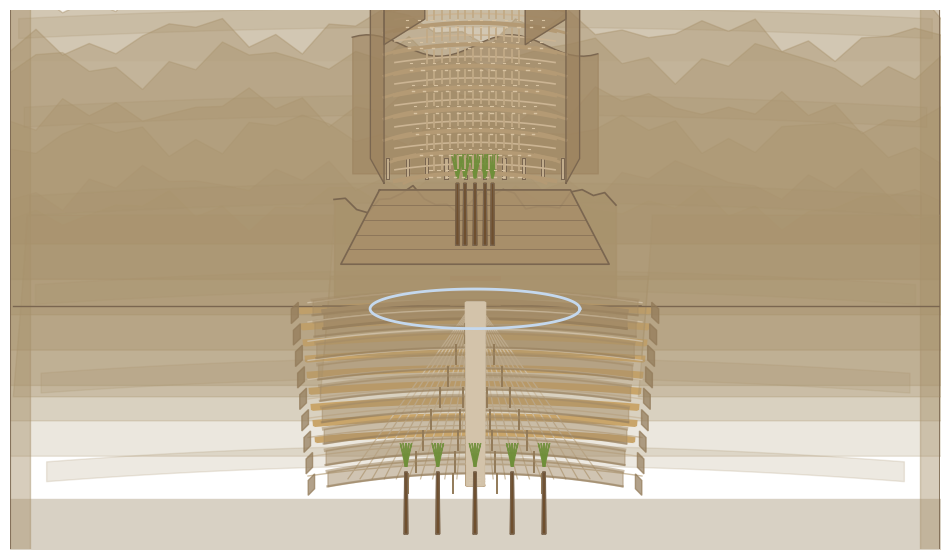

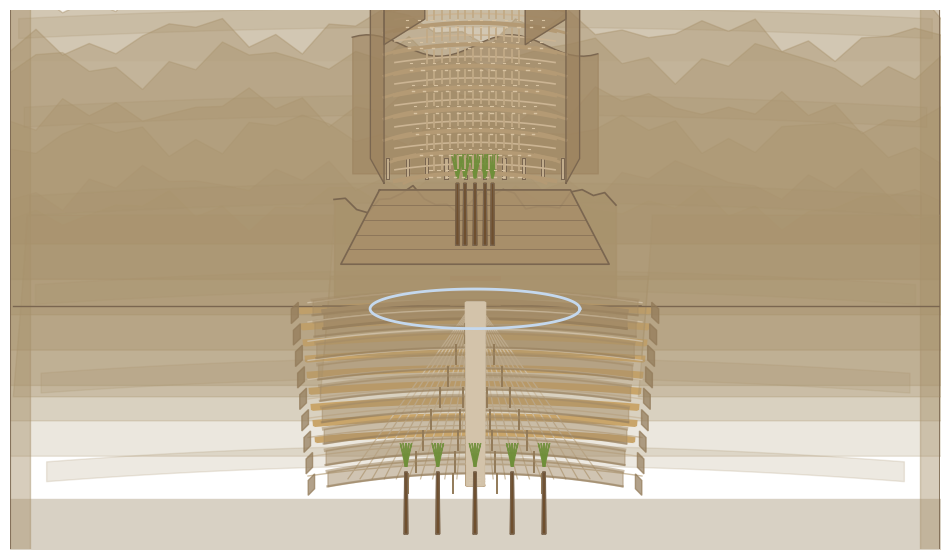

In [115]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

# =================================================
# GLOBAL CONSTANTS
# =================================================
GROUND_Y = -15

CENTER_WIDTH = 160        # wider resort width
MALL_WIDTH = CENTER_WIDTH * 1.85
MALL_CANYON_TOP_WIDTH = MALL_WIDTH * 1.05
MALL_CANYON_BOTTOM_WIDTH = MALL_WIDTH * 0.85
MALL_WING_EXTENT = 140    # wider wings for scale

CURVE_AMPLITUDE = 2.0     # stronger curvature
BASE_Y_START = 6
FLOOR_STEP = 2.6
HOTEL_CURVE_AMPLITUDE = 1.25
MALL_TOP_Y = 7.6
MALL_ITERATIONS = 1
RESORT_BASE_Y = 22
RESORT_FLOORS = 10
CANYON_WIDTH = 820
CANYON_OPENING_WIDTH = max(MALL_CANYON_TOP_WIDTH * 0.9, CENTER_WIDTH * 1.35)
SCENE_EXTENT_X = CANYON_WIDTH / 2 - 1
SCENE_EXTENT_Y = 78

COURTYARD_VX = 0
COURTYARD_VY = 26
SCENE_MODE = "neutral"

# =================================================
# TEXTURE PALETTE (SURFACE MATERIALS)
# =================================================
TEXTURE_PALETTE = {
    "resort_main": "#b49a74",
    "resort_shadow": "#9c825e",
    "resort_rail": "#cbb493",
    "resort_window": "#c2aa86",
    "podium": "#a88f6a",
    "mall_main": "#a38b67",
    "mall_accent": "#927a58",
    "mall_glass": "#cdbda3",
    "shop_glass": "#d6c6ad",
    "shop_frame": "#b59a76",
    "shop_shadow": "#a48966",
    "shop_sign": "#c9a56a",
    "cave": "#a8926c",
    "cave_edge": "#7a6650",
    "light": "#f5c67e",
    "ring": "#c4d8ee",
    "env_floor": "#d8d1c4",
    "env_ceiling": "#f7f4ef",
    "palm_trunk": "#6f4f2e",
    "palm_frond": "#6f8f3a",
    "resort_trim": "#d8c3a2",
    "resort_accent": "#caa76d"
}

# =================================================
# CACHED GRIDS (PERFORMANCE)
# =================================================
XS_COARSE = np.linspace(-0.5, 0.5, 28)
XS_MED = np.linspace(-0.5, 0.5, 36)
XS_FINE = np.linspace(-0.5, 0.5, 40)
YS_MED = np.linspace(0.0, 1.0, 36)

# =================================================
# GEOMETRY HELPERS
# =================================================
def scaled_xs(xs_norm, width):
    return xs_norm * width

def perspective_x(x, y, anchor_x=0, vanishing_y=65,
                  strength=0.009, min_scale=0.6, courtyard=False):
    depth = np.maximum(0.0, vanishing_y - y)
    scale = np.maximum(min_scale, 1 - depth * strength)
    px = anchor_x + (x - anchor_x) * scale
    if courtyard:
        px += (COURTYARD_VX - px) * np.maximum(0.0, (COURTYARD_VY - y)) * 0.055
    return px

def curved_y(x, base_y, width, amp):
    return base_y + amp * (1 - (x / (width / 2))**2)

def canyon_width_at_y(y, y_top, y_bottom, width_top, width_bottom):
    t = (y - y_bottom) / (y_top - y_bottom)
    return width_top * t + width_bottom * (1 - t)

def canyon_curve(y):
    return 22 * np.sin(y * 0.045) + 10 * np.sin(y * 0.018 + 1.3)

# =================================================
# PERSPECTIVE + CURVE HELPERS
# =================================================
def draw_multistory_shop_wall(ax, top_y, bottom_y, width, columns, floor_step, palette, xs_med, amp):
    shop_width = width * 0.05
    xs = np.linspace(-width * 0.48, width * 0.48, columns)

    for i, x in enumerate(xs):
        px_top = perspective_x(x, top_y, courtyard=True)

        ax.fill_between(
            [px_top - shop_width / 2, px_top + shop_width / 2],
            bottom_y, top_y,
            color=palette["shop_glass"],
            alpha=0.3,
            zorder=6
        )

        ax.plot(
            [px_top - shop_width / 2, px_top + shop_width / 2],
            [bottom_y, bottom_y],
            color=palette["shop_frame"],
            linewidth=1.0
        )
        ax.plot(
            [px_top - shop_width / 2, px_top + shop_width / 2],
            [top_y, top_y],
            color=palette["shop_frame"],
            linewidth=1.0
        )
        ax.plot(
            [px_top - shop_width / 2, px_top - shop_width / 2],
            [bottom_y, top_y],
            color=palette["shop_frame"],
            linewidth=1.2
        )
        ax.plot(
            [px_top + shop_width / 2, px_top + shop_width / 2],
            [bottom_y, top_y],
            color=palette["shop_frame"],
            linewidth=1.2
        )

        for y in np.arange(bottom_y, top_y, floor_step):
            py = curved_y(x, y, width, amp * 0.7)
            ax.plot(
                [px_top - shop_width / 2, px_top + shop_width / 2],
                [py, py],
                color=palette["shop_frame"],
                linewidth=0.9
            )

    band_y = bottom_y + (top_y - bottom_y) * 0.25
    xs_band = scaled_xs(xs_med, width)
    ys_band = curved_y(xs_band, band_y, width, amp * 0.4)
    ax.plot(xs_band, ys_band, color=palette["shop_sign"], linewidth=4.5, zorder=2)
    ax.plot(xs_band, ys_band - 0.3, color=palette["shop_sign"], linewidth=2.2, zorder=2)

# =================================================
# BACKGROUND CAVES — TERRACED / INHABITED
# =================================================
def draw_background_caves(ax, base_y, height, width, layers, xs_med, amp):
    xs = scaled_xs(xs_med, width)
    for i in range(layers):
        layer_y = base_y + i * (height / layers)
        erosion = np.maximum(0.0, np.sin(xs * 0.12 + i * 1.4)) * 2.6
        terrace = (i % 2) * 1.2
        ys = curved_y(
            xs,
            layer_y + np.sin(xs * 0.04 + i) * 1.4 - erosion - terrace,
            width,
            amp * (0.7 + i * 0.12)
        )
        ax.fill_between(
            xs,
            ys,
            layer_y - height,
            color=TEXTURE_PALETTE["cave"],
            alpha=0.22 + i * 0.04,
            zorder=1
        )

# =================================================
# CANYON INTEGRATION (MALL EMBED)
# =================================================
def draw_canyon_integration(ax, rim_y, width, opening_width, depth, ys_med):
    ys = rim_y - depth + ys_med * (depth * 2)
    curve = canyon_curve(ys) * 0.6
    left = -width / 2 + curve
    right = width / 2 + curve
    opening_left = -opening_width / 2 + curve
    opening_right = opening_width / 2 + curve

    ax.fill_betweenx(
        ys,
        left,
        opening_left,
        color=TEXTURE_PALETTE["cave"],
        alpha=0.3,
        zorder=3
    )
    ax.fill_betweenx(
        ys,
        opening_right,
        right,
        color=TEXTURE_PALETTE["cave"],
        alpha=0.3,
        zorder=3
    )
    ax.plot(
        [left[0], opening_left[0], opening_right[0], right[0]],
        [rim_y, rim_y, rim_y, rim_y],
        color=TEXTURE_PALETTE["cave_edge"],
        linewidth=1.0,
        zorder=4
    )

def draw_canyon_closure(ax, rim_y, opening_width, depth):
    ys = np.linspace(rim_y - depth, rim_y + depth * 0.6, 30)
    curve = canyon_curve(ys) * 0.6
    opening_left = -opening_width / 2 + curve
    opening_right = opening_width / 2 + curve
    ax.fill_betweenx(
        ys,
        opening_left,
        opening_right,
        color=TEXTURE_PALETTE["cave"],
        alpha=0.45,
        zorder=3
    )
    ax.plot([opening_left[0], opening_right[0]], [rim_y, rim_y], color=TEXTURE_PALETTE["cave_edge"], linewidth=1.1, zorder=4)

def draw_canyon_enclosure(ax, top_y, bottom_y, width_top, width_bottom, amp, bands=5):
    ys = np.linspace(top_y, bottom_y, bands)
    for i, y in enumerate(ys):
        width = canyon_width_at_y(y, top_y, bottom_y, width_top, width_bottom)
        xs = scaled_xs(XS_MED, width)
        curve = canyon_curve(y) * 0.05
        ys_band = curved_y(xs + curve, y, width, amp * (0.7 + i * 0.06))
        ax.fill_between(xs, ys_band - 1.4, ys_band + 1.0, color=TEXTURE_PALETTE["cave"], alpha=0.2, zorder=2)

# =================================================
# LIMINAL RING
# =================================================
def draw_liminal_ring(ax, y, width, height, color):
    theta = np.linspace(0, 2 * np.pi, 120)
    xs = (width / 2) * 0.55 * np.cos(theta)
    ys = y + height * np.sin(theta)
    ax.plot(xs, ys, color=color, linewidth=2.0, zorder=6)

# =================================================
# MALL FACADE
# =================================================
def draw_mall_facade(ax, base_y_top, base_y_bottom, width, amp, xs_med, color):
    for y in np.linspace(base_y_top, base_y_bottom, 10):
        xs = scaled_xs(xs_med, width * 0.9)
        ys = curved_y(xs, y, width, amp)
        ax.plot(xs, ys, color=color, linewidth=1.0, zorder=4)

    for x in np.linspace(-width * 0.48, width * 0.48, 22):
        ys = np.array([base_y_bottom, base_y_top])
        pxs = perspective_x(np.array([x, x]), ys, courtyard=True)
        ax.plot(pxs, ys, color=color, linewidth=0.9, zorder=4)

# =================================================
# ENVIRONMENT
# =================================================
def draw_environment(ax, scene_x, y_bottom, y_top, palette):
    floor_top = y_bottom + 6
    floor_front = y_bottom - 4
    ax.fill_between(
        [-scene_x, scene_x],
        y_bottom - 6,
        floor_front,
        color=palette["env_floor"],
        zorder=-2
    )
    ax.fill_between(
        [-scene_x, scene_x],
        floor_front,
        floor_top,
        color=palette["env_floor"],
        zorder=-1
    )
    ax.plot(
        [-scene_x, scene_x],
        [floor_front, floor_front],
        color=palette["cave_edge"],
        linewidth=1.0,
        zorder=-1
    )
    ax.fill_between(
        [-scene_x, scene_x],
        y_top - 6,
        y_top + 12,
        color=palette["env_ceiling"],
        zorder=-1
    )
    # side walls to close scene
    ax.fill_betweenx(
        [y_bottom - 8, y_top + 12],
        -scene_x,
        -scene_x + 18,
        color=palette["cave"],
        alpha=0.45,
        zorder=0
    )
    ax.fill_betweenx(
        [y_bottom - 8, y_top + 12],
        scene_x - 18,
        scene_x,
        color=palette["cave"],
        alpha=0.45,
        zorder=0
    )
    ax.plot([-scene_x, -scene_x], [y_bottom - 8, y_top + 12], color=palette["cave_edge"], linewidth=1.2, zorder=1)
    ax.plot([scene_x, scene_x], [y_bottom - 8, y_top + 12], color=palette["cave_edge"], linewidth=1.2, zorder=1)

# =================================================
# RESORT FACADE + ROCK BASE
# =================================================
def draw_resort_rock_base(ax, base_y, width, height, palette):
    xs = np.linspace(-width / 2, width / 2, 26)
    noise = 1.2 * np.sin(xs * 0.08) + 0.6 * np.sin(xs * 0.22 + 1.1)
    ys = base_y + noise
    ax.fill_between(xs, ys, base_y - height, color=palette["cave"], alpha=0.75, zorder=3)
    ax.plot(xs, ys, color=palette["cave_edge"], linewidth=1.2, zorder=4)

def draw_resort_back_layer(ax, base_y, width, height, palette):
    xs = np.linspace(-width / 2, width / 2, 36)
    ridge = base_y + height + np.sin(xs * 0.05) * 1.3
    ax.fill_between(xs, ridge, base_y, color=palette["resort_shadow"], alpha=0.55, zorder=2)
    ax.plot(xs, ridge, color=palette["cave_edge"], linewidth=1.0, zorder=3)

def draw_resort_platform(ax, base_y, width, depth, flare, color, edge_color):
    y0 = base_y
    y1 = base_y - depth
    poly = [(-width / 2, y0), (width / 2, y0), (width / 2 + flare, y1), (-width / 2 - flare, y1)]
    ax.fill([p[0] for p in poly], [p[1] for p in poly], color=color, alpha=0.85, zorder=4)
    ax.plot([p[0] for p in poly + [poly[0]]], [p[1] for p in poly + [poly[0]]], color=edge_color, linewidth=1.2, zorder=5)
    step_count = 4
    for i in range(1, step_count + 1):
        t = i / (step_count + 1)
        y = y0 - depth * t
        left = -width / 2 - flare * t
        right = width / 2 + flare * t
        ax.plot([left, right], [y, y], color=edge_color, linewidth=0.6, alpha=0.7, zorder=5)

def draw_resort_facade(ax, base_y, floors, bays, bay_width, floor_height, color):
    total_width = bays * bay_width
    left, right = -total_width / 2, total_width / 2
    center_left, center_right = -CENTER_WIDTH / 2, CENTER_WIDTH / 2
    xs = scaled_xs(XS_MED, CENTER_WIDTH * 0.88)

    # base arcade (arches)
    arch_y = base_y + floor_height * 0.2
    arch_h = floor_height * 1.0
    arch_w = bay_width * 0.8
    for x in np.linspace(center_left + bay_width, center_right - bay_width, 10):
        x0, x1 = x - arch_w / 2, x + arch_w / 2
        poly = [(x0, arch_y), (x1, arch_y), (x1, arch_y + arch_h), (x0, arch_y + arch_h)]
        ax.fill([p[0] for p in poly], [p[1] for p in poly], color=TEXTURE_PALETTE["resort_trim"], alpha=0.65, zorder=4)
        ax.plot([p[0] for p in poly + [poly[0]]], [p[1] for p in poly + [poly[0]]], color=TEXTURE_PALETTE["cave_edge"], linewidth=0.8, zorder=5)

    for f in range(floors):
        y = base_y + f * floor_height
        ys = curved_y(xs, y, CENTER_WIDTH, HOTEL_CURVE_AMPLITUDE)
        ax.plot(xs, ys, color=color, linewidth=3.0, zorder=5)
        ys_bal = curved_y(xs, y + floor_height * 0.55, CENTER_WIDTH, HOTEL_CURVE_AMPLITUDE * 0.75)
        ax.plot(xs, ys_bal, color=TEXTURE_PALETTE["resort_rail"], linewidth=1.2, zorder=5)

        # balcony rhythm
        for x in np.linspace(center_left + bay_width, center_right - bay_width, 12):
            px = perspective_x(x, y + floor_height * 0.3, courtyard=True)
            ax.plot([px - bay_width * 0.3, px + bay_width * 0.3], [y + floor_height * 0.3, y + floor_height * 0.3], color=TEXTURE_PALETTE["resort_trim"], linewidth=1.0, zorder=6)
            ax.plot([px - bay_width * 0.3, px + bay_width * 0.3], [y + floor_height * 0.6, y + floor_height * 0.6], color=TEXTURE_PALETTE["resort_trim"], linewidth=0.8, zorder=6)

        for side in [-1, 1]:
            xs_wing = np.linspace(
                center_right if side == 1 else center_left,
                right if side == 1 else left,
                18
            )
            pxs = perspective_x(xs_wing, y, anchor_x=side * CENTER_WIDTH / 2, courtyard=True)
            ys_wing = curved_y(xs_wing, y, CENTER_WIDTH, HOTEL_CURVE_AMPLITUDE)
            ax.plot(pxs, ys_wing, color=color, linewidth=2.0, zorder=5)

        for i in range(0, bays, 2):
            x = left + i * bay_width + bay_width / 2
            if center_left <= x <= center_right:
                px = x
                lw = 1.4
                alpha = 0.9
            else:
                px = perspective_x(x, y, anchor_x=center_left if x < center_left else center_right, courtyard=True)
                lw = 1.1
                alpha = 0.8
            y_bot = curved_y(x, y + floor_height * 0.25, CENTER_WIDTH, HOTEL_CURVE_AMPLITUDE)
            y_top = curved_y(x, y + floor_height * 0.8, CENTER_WIDTH, HOTEL_CURVE_AMPLITUDE)
            ax.plot([px, px], [y_bot, y_top], color=TEXTURE_PALETTE["resort_window"], linewidth=lw, alpha=alpha, zorder=6)

    roof_y = base_y + floors * floor_height
    terrace_levels = [0.0, 2.0, 4.1, 5.8]
    terrace_widths = [CENTER_WIDTH * 1.0, CENTER_WIDTH * 0.82, CENTER_WIDTH * 0.64, CENTER_WIDTH * 0.5]
    for i in range(len(terrace_levels) - 1):
        y0 = roof_y + terrace_levels[i]
        y1 = roof_y + terrace_levels[i + 1]
        w0 = terrace_widths[i]
        w1 = terrace_widths[i + 1]
        poly = [(-w0 / 2, y0), (w0 / 2, y0), (w1 / 2, y1), (-w1 / 2, y1)]
        fill_color = TEXTURE_PALETTE["resort_shadow"] if i % 2 == 0 else TEXTURE_PALETTE["resort_main"]
        ax.fill([p[0] for p in poly], [p[1] for p in poly], color=fill_color, zorder=6)
        ax.plot([p[0] for p in poly + [poly[0]]], [p[1] for p in poly + [poly[0]]], color=TEXTURE_PALETTE["cave_edge"], linewidth=1.0, zorder=7)

    # central crown + sign band
    crown_w = CENTER_WIDTH * 0.3
    crown_h = 3.0
    crown_y = roof_y + terrace_levels[-1] + 0.4
    crown = [(-crown_w / 2, crown_y), (crown_w / 2, crown_y), (crown_w / 2, crown_y + crown_h), (-crown_w / 2, crown_y + crown_h)]
    ax.fill([p[0] for p in crown], [p[1] for p in crown], color=TEXTURE_PALETTE["resort_accent"], zorder=7)
    ax.plot([p[0] for p in crown + [crown[0]]], [p[1] for p in crown + [crown[0]]], color=TEXTURE_PALETTE["cave_edge"], linewidth=0.9, zorder=8)
    ax.plot([-crown_w * 0.35, crown_w * 0.35], [crown_y + crown_h * 0.55, crown_y + crown_h * 0.55], color=TEXTURE_PALETTE["resort_trim"], linewidth=2.0, zorder=8)

    wing_slope = 7.0
    for side in [-1, 1]:
        wing_left = center_right if side == 1 else left
        wing_right = right if side == 1 else center_left
        poly = [
            (wing_left, roof_y - 1.2),
            (wing_right, roof_y - 2.2),
            (wing_right, roof_y - 2.2 - wing_slope),
            (wing_left, roof_y - 1.2 - wing_slope * 0.7)
        ]
        ax.fill([p[0] for p in poly], [p[1] for p in poly], color=TEXTURE_PALETTE["resort_shadow"], alpha=0.85, zorder=5)
        ax.plot([p[0] for p in poly + [poly[0]]], [p[1] for p in poly + [poly[0]]], color=TEXTURE_PALETTE["cave_edge"], linewidth=0.9, zorder=6)

    # polygonal side facets for 3D massing
    facet_depth = 12
    for side in [-1, 1]:
        edge = center_right if side == 1 else center_left
        poly = [
            (edge, base_y),
            (edge, roof_y + 6),
            (edge + side * facet_depth, roof_y + 3),
            (edge + side * facet_depth, base_y + 3)
        ]
        ax.fill([p[0] for p in poly], [p[1] for p in poly], color=TEXTURE_PALETTE["resort_shadow"], alpha=0.7, zorder=4)
        ax.plot([p[0] for p in poly + [poly[0]]], [p[1] for p in poly + [poly[0]]], color=TEXTURE_PALETTE["cave_edge"], linewidth=0.9, zorder=5)

# =================================================
# PALM TREES
# =================================================
def draw_palm_trees(ax, base_y, positions, trunk_h=7.5, frond_h=3.5):
    for x in positions:
        px = perspective_x(x, base_y, courtyard=True)
        trunk_w = 1.6
        trunk_poly = [
            (px - trunk_w, base_y),
            (px + trunk_w, base_y),
            (px + trunk_w * 0.7, base_y + trunk_h),
            (px - trunk_w * 0.7, base_y + trunk_h)
        ]
        ax.fill([p[0] for p in trunk_poly], [p[1] for p in trunk_poly], color=TEXTURE_PALETTE["palm_trunk"], zorder=6)
        ax.plot([p[0] for p in trunk_poly + [trunk_poly[0]]], [p[1] for p in trunk_poly + [trunk_poly[0]]], color=TEXTURE_PALETTE["cave_edge"], linewidth=0.8, zorder=7)
        for dx in [-5.0, -2.5, 0.0, 2.5, 5.0]:
            tip = (px + dx, base_y + trunk_h + frond_h)
            base_left = (px - 0.6, base_y + trunk_h + frond_h * 0.2)
            base_right = (px + 0.6, base_y + trunk_h + frond_h * 0.2)
            ax.fill([base_left[0], tip[0], base_right[0]], [base_left[1], tip[1], base_right[1]], color=TEXTURE_PALETTE["palm_frond"], alpha=0.9, zorder=6)

# =================================================
# RENDER
# =================================================
def render_scene():
    fig, ax = plt.subplots(figsize=(12, 7))

    draw_resort_back_layer(ax, base_y=RESORT_BASE_Y + 1.2, width=CENTER_WIDTH * 1.35, height=15.5, palette=TEXTURE_PALETTE)
    draw_resort_rock_base(ax, base_y=RESORT_BASE_Y - 2.0, width=CENTER_WIDTH * 1.55, height=12, palette=TEXTURE_PALETTE)
    draw_resort_platform(
        ax,
        base_y=RESORT_BASE_Y - 0.8,
        width=CENTER_WIDTH * 1.05,
        depth=9.0,
        flare=34,
        color=TEXTURE_PALETTE["podium"],
        edge_color=TEXTURE_PALETTE["cave_edge"]
    )
    # platform palms
    draw_palm_trees(ax, base_y=RESORT_BASE_Y - 7.5, positions=[-70, -40, 0, 40, 70])
    draw_resort_facade(
        ax,
        base_y=RESORT_BASE_Y,
        floors=RESORT_FLOORS,
        bays=26,
        bay_width=3.4,
        floor_height=2.6,
        color=TEXTURE_PALETTE["resort_main"]
    )

    for y in [13.5, 10.5, 7.5]:
        xs = np.array([-34, 34])
        pxs = perspective_x(xs, y, strength=0.065)
        ax.plot(pxs, [y, y], color=TEXTURE_PALETTE["podium"], linewidth=3.4, zorder=5)

    curved_slab_3d_y = 7.5 - 1.0
    xs = scaled_xs(XS_MED, MALL_WIDTH * 0.9)
    ys = curved_y(xs, curved_slab_3d_y, MALL_WIDTH * 0.9, CURVE_AMPLITUDE * 0.6)
    ax.fill_between(xs, ys - 2.1, ys, color=TEXTURE_PALETTE["mall_main"], alpha=0.8, zorder=4)
    ax.plot(xs, ys, color=TEXTURE_PALETTE["mall_main"], linewidth=3.2, zorder=5)
    ax.plot(xs, ys - 2.1, color=TEXTURE_PALETTE["mall_accent"], linewidth=2.0, zorder=4)

    mall_axiom = "F"
    mall_rules = {"F": "F+F-F", "+": "+", "-": "-"}
    mall_string = "".join(mall_rules.get(c, c) for c in mall_axiom)
    for _ in range(MALL_ITERATIONS):
        mall_string = "".join(mall_rules.get(c, c) for c in mall_string)
    BASE_Y = MALL_TOP_Y
    depth_level = 0
    MALL_BOTTOM_Y = BASE_Y - len(mall_string) * FLOOR_STEP + 1.2

    for cmd in mall_string:
        if cmd != "F":
            continue
        width = canyon_width_at_y(BASE_Y, MALL_TOP_Y, MALL_BOTTOM_Y, MALL_CANYON_TOP_WIDTH, MALL_CANYON_BOTTOM_WIDTH)
        amp = CURVE_AMPLITUDE * (0.7 + depth_level * 0.03)
        alpha = min(0.7, 0.4 + depth_level * 0.02)
        xs = scaled_xs(XS_FINE, width * 0.92)
        ys = curved_y(xs, BASE_Y, width, amp)
        ax.fill_between(xs, ys - 1.8, ys, color=TEXTURE_PALETTE["mall_main"], alpha=alpha * 0.9, zorder=5)
        ax.plot(xs, ys, color=TEXTURE_PALETTE["mall_main"], linewidth=2.6, alpha=alpha, zorder=6)
        ax.plot(xs, ys - 1.8, color=TEXTURE_PALETTE["mall_accent"], linewidth=1.6, alpha=alpha, zorder=5)

        for x in np.linspace(-width * 0.3, width * 0.3, 4):
            px = perspective_x(x, BASE_Y, courtyard=True)
            ax.plot([px, px], [BASE_Y - FLOOR_STEP * 0.9, BASE_Y], color=TEXTURE_PALETTE["mall_accent"], linewidth=1.4, zorder=6)

        # side facets to read as 3D blocks
        facet_w = width * 0.02
        for side in [-1, 1]:
            edge = side * width * 0.5
            poly = [
                (edge, BASE_Y - 1.8),
                (edge, BASE_Y),
                (edge + side * facet_w, BASE_Y - 0.8),
                (edge + side * facet_w, BASE_Y - 2.6)
            ]
            ax.fill([p[0] for p in poly], [p[1] for p in poly], color=TEXTURE_PALETTE["mall_accent"], alpha=0.7, zorder=5)

        BASE_Y -= FLOOR_STEP
        depth_level += 1
        draw_multistory_shop_wall(
            ax,
            top_y=MALL_TOP_Y,
            bottom_y=BASE_Y + FLOOR_STEP * 0.5,
            width=width * 0.98,
            columns=18,
            floor_step=FLOOR_STEP,
            palette=TEXTURE_PALETTE,
            xs_med=XS_MED,
            amp=CURVE_AMPLITUDE
        )

    draw_mall_facade(
        ax,
        base_y_top=7.2,
        base_y_bottom=BASE_Y + 2,
        width=canyon_width_at_y(MALL_TOP_Y, MALL_TOP_Y, MALL_BOTTOM_Y, MALL_CANYON_TOP_WIDTH, MALL_CANYON_BOTTOM_WIDTH) * 1.05,
        amp=CURVE_AMPLITUDE * 0.9,
        xs_med=XS_MED,
        color=TEXTURE_PALETTE["mall_glass"]
    )

    draw_liminal_ring(
        ax,
        y=6.8,
        width=canyon_width_at_y(MALL_TOP_Y, MALL_TOP_Y, MALL_BOTTOM_Y, MALL_CANYON_TOP_WIDTH, MALL_CANYON_BOTTOM_WIDTH) * 1.08,
        height=2.4,
        color=TEXTURE_PALETTE["ring"]
    )

    draw_background_caves(
        ax,
        base_y=19,
        height=30,
        width=CANYON_WIDTH,
        layers=7,
        xs_med=XS_MED,
        amp=CURVE_AMPLITUDE
    )

    draw_canyon_integration(
        ax,
        rim_y=MALL_TOP_Y - 0.4,
        width=CANYON_WIDTH,
        opening_width=CANYON_OPENING_WIDTH,
        depth=11,
        ys_med=YS_MED
    )
    draw_canyon_closure(
        ax,
        rim_y=MALL_TOP_Y - 0.4,
        opening_width=CANYON_OPENING_WIDTH,
        depth=6
    )
    draw_canyon_enclosure(
        ax,
        top_y=RESORT_BASE_Y + RESORT_FLOORS * 1.9,
        bottom_y=BASE_Y + FLOOR_STEP * 1.2,
        width_top=CANYON_WIDTH * 0.98,
        width_bottom=CANYON_WIDTH * 0.92,
        amp=CURVE_AMPLITUDE,
        bands=6
    )

    draw_environment(ax, SCENE_EXTENT_X, BASE_Y - FLOOR_STEP * 2.5, RESORT_BASE_Y + RESORT_FLOORS * 2.6 - 5.0, TEXTURE_PALETTE)
    draw_palm_trees(ax, base_y=BASE_Y - FLOOR_STEP * 1.8, positions=[-65, -35, 0, 35, 65])

    x_max = SCENE_EXTENT_X
    y_min = BASE_Y - FLOOR_STEP * 2.5
    y_max = RESORT_BASE_Y + RESORT_FLOORS * 2.6 - 5.0
    ax.set_xlim(-x_max, x_max)
    ax.set_ylim(y_min, y_max)
    ax.axis("off")
    ax.margins(0, 0)

    fig.savefig(
        "liminal_resort_mall.png",
        dpi=300,
        bbox_inches="tight",
        pad_inches=0,
        transparent=False
    )
    return fig

fig = render_scene()
display(fig)

## Variation 2

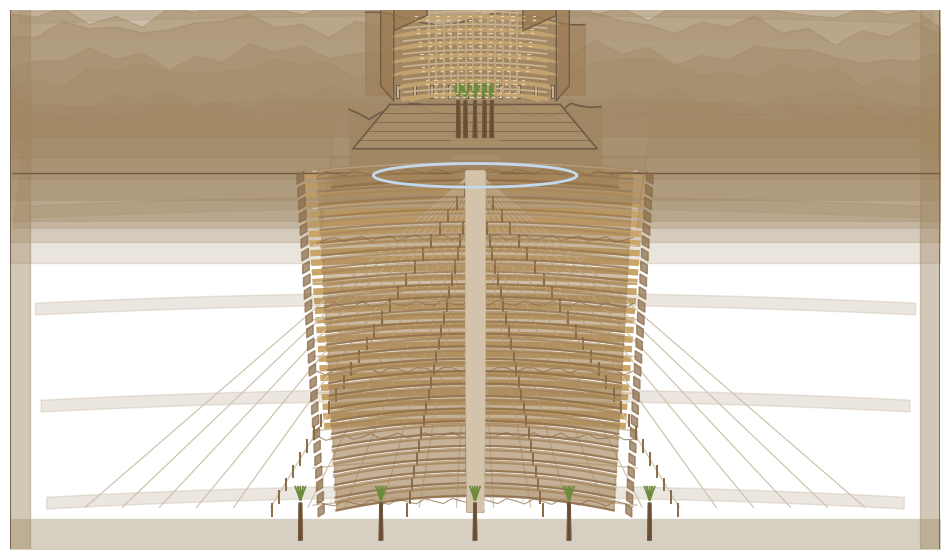

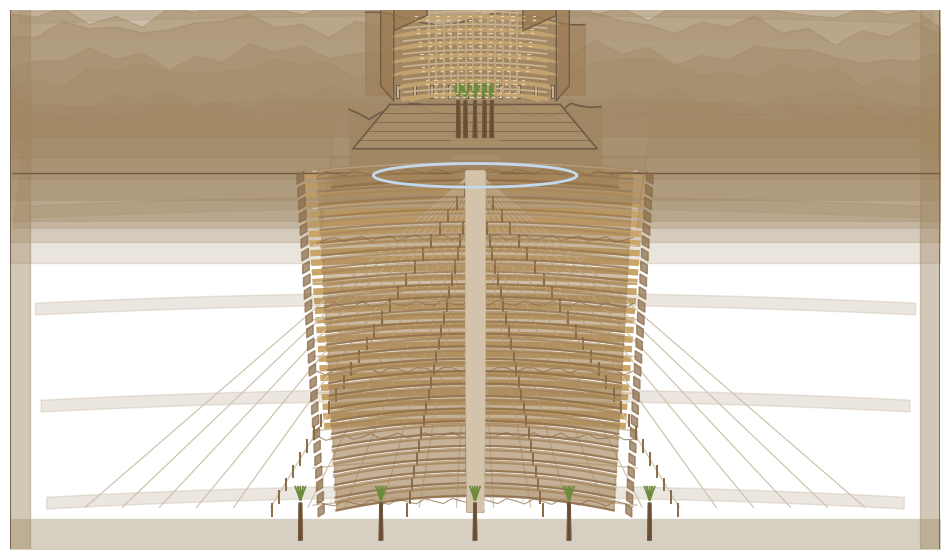

In [116]:
# 2nd variation (simple overrides + call)
# Width + pattern adjustments
CENTER_WIDTH = 150
MALL_WIDTH = CENTER_WIDTH * 1.95
MALL_CANYON_TOP_WIDTH = MALL_WIDTH * 1.08
MALL_CANYON_BOTTOM_WIDTH = MALL_WIDTH * 0.82
CANYON_WIDTH = 860
CANYON_OPENING_WIDTH = max(MALL_CANYON_TOP_WIDTH * 0.92, CENTER_WIDTH * 1.3)
SCENE_EXTENT_X = CANYON_WIDTH / 2 - 1

CURVE_AMPLITUDE = 2.4
HOTEL_CURVE_AMPLITUDE = 1.45
MALL_ITERATIONS = 2
RESORT_FLOORS = 9

# Color tweaks
TEXTURE_PALETTE.update({
    "resort_main": "#c2a36f",
    "resort_shadow": "#9c7b54",
    "resort_trim": "#e2cfae",
    "resort_accent": "#d9b064",
    "mall_main": "#a4845a",
    "mall_accent": "#8a6a47",
    "mall_glass": "#d2c4ad",
    "cave": "#9f8662",
    "cave_edge": "#6f5b46",
    "env_floor": "#d7d0c2",
    "env_ceiling": "#f4efe8",
    "palm_trunk": "#6a4a2a",
    "palm_frond": "#6b8a3a"
})

# Weird pattern overlay (no extra height)
def draw_mall_facade(ax, base_y_top, base_y_bottom, width, amp, xs_med, color):
    for y in np.linspace(base_y_top, base_y_bottom, 10):
        xs = scaled_xs(xs_med, width * 0.9)
        ys = curved_y(xs, y, width, amp)
        ax.plot(xs, ys, color=color, linewidth=1.0, zorder=4)

    for x in np.linspace(-width * 0.48, width * 0.48, 22):
        ys = np.array([base_y_bottom, base_y_top])
        pxs = perspective_x(np.array([x, x]), ys, courtyard=True)
        ax.plot(pxs, ys, color=color, linewidth=0.9, zorder=4)

    rows = np.linspace(base_y_bottom + 0.4, base_y_top - 0.4, 6)
    for i, y in enumerate(rows):
        xs = scaled_xs(xs_med, width * 0.88)
        wobble = np.sin(xs * 0.25 + i * 0.8) * 0.6
        ys = curved_y(xs, y, width, amp * 0.4) + wobble
        ax.plot(xs, ys, color=TEXTURE_PALETTE["mall_accent"], linewidth=0.8, alpha=0.7, zorder=5)
        for x in np.linspace(-width * 0.4, width * 0.4, 10):
            base = curved_y(x, y, width, amp * 0.4)
            h = 0.8 if i % 2 == 0 else -0.8
            tri = [(x - 0.8, base), (x + 0.8, base), (x, base + h)]
            ax.fill([p[0] for p in tri], [p[1] for p in tri], color=TEXTURE_PALETTE["mall_glass"], alpha=0.25, zorder=4)

fig = render_scene()
fig.savefig("liminal_resort_mall_as_2.png", dpi=300, bbox_inches="tight", pad_inches=0, transparent=False)
display(fig)

## Variation 3

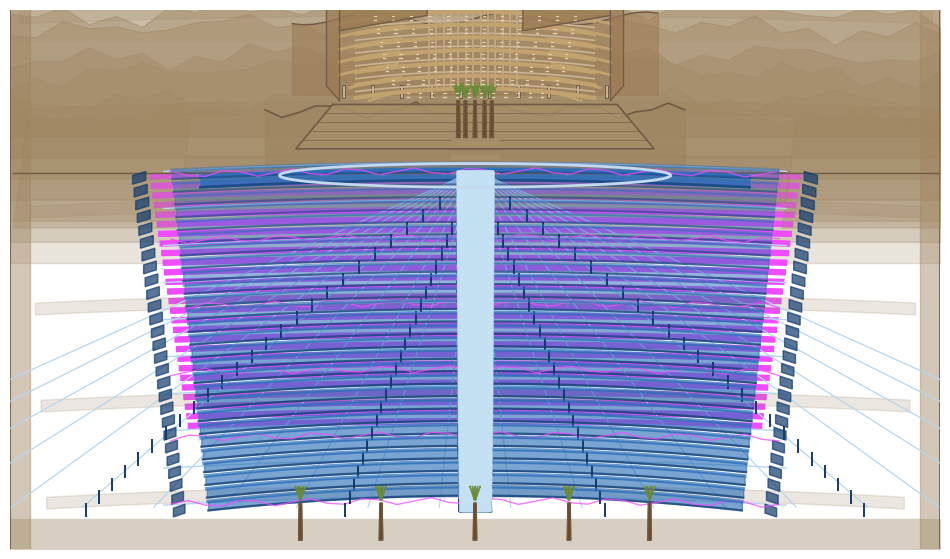

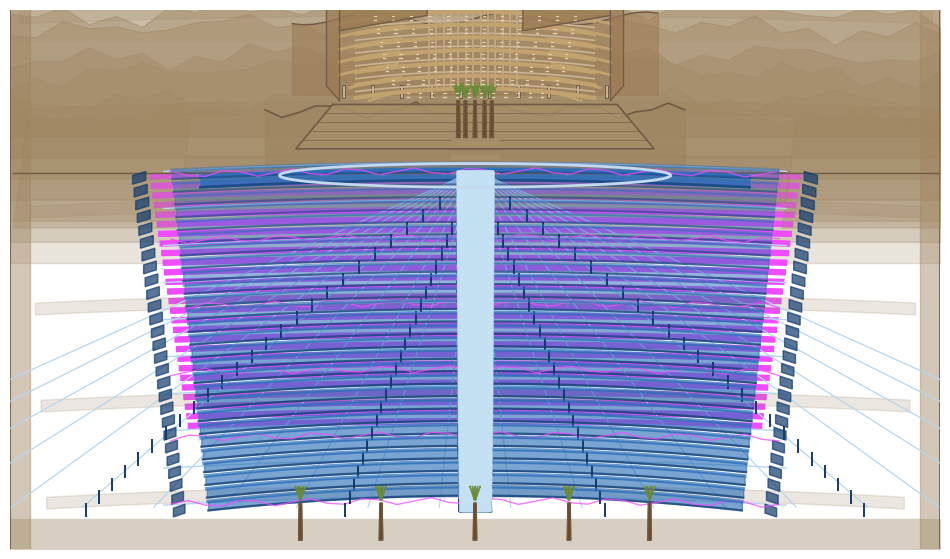

In [117]:
# 3rd variation (simple overrides + call)
# Width + pattern adjustments
CENTER_WIDTH = 250
MALL_WIDTH = CENTER_WIDTH * 2.25
MALL_CANYON_TOP_WIDTH = MALL_WIDTH * 1.08
MALL_CANYON_BOTTOM_WIDTH = MALL_WIDTH * 0.82
CANYON_WIDTH = 860
CANYON_OPENING_WIDTH = max(MALL_CANYON_TOP_WIDTH * 0.92, CENTER_WIDTH * 1.3)
SCENE_EXTENT_X = CANYON_WIDTH / 2 - 1

CURVE_AMPLITUDE = 2.4
HOTEL_CURVE_AMPLITUDE = 2.45
MALL_ITERATIONS = 2
RESORT_FLOORS = 9

# Color tweaks (blue mall + bold pattern accents)
TEXTURE_PALETTE.update({
    "resort_main": "#c2a36f",
    "resort_shadow": "#9c7b54",
    "resort_trim": "#e2cfae",
    "resort_accent": "#d9b064",
    "mall_main": "#2c6fb8",
    "mall_accent": "#123a6d",
    "mall_glass": "#b7d6f1",
    "shop_glass": "#c7e3f6",
    "shop_frame": "#1b3b70",
    "shop_sign": "#f04cff",
    "cave": "#9f8662",
    "cave_edge": "#6f5b46",
    "env_floor": "#d7d0c2",
    "env_ceiling": "#f4efe8",
    "palm_trunk": "#6a4a2a",
    "palm_frond": "#6b8a3a"
})

# Weird pattern overlay (no extra height)
def draw_mall_facade(ax, base_y_top, base_y_bottom, width, amp, xs_med, color):
    for y in np.linspace(base_y_top, base_y_bottom, 10):
        xs = scaled_xs(xs_med, width * 0.9)
        ys = curved_y(xs, y, width, amp)
        ax.plot(xs, ys, color=color, linewidth=1.0, zorder=4)

    for x in np.linspace(-width * 0.48, width * 0.48, 22):
        ys = np.array([base_y_bottom, base_y_top])
        pxs = perspective_x(np.array([x, x]), ys, courtyard=True)
        ax.plot(pxs, ys, color=color, linewidth=0.9, zorder=4)

    rows = np.linspace(base_y_bottom + 0.4, base_y_top - 0.4, 6)
    for i, y in enumerate(rows):
        xs = scaled_xs(xs_med, width * 0.88)
        wobble = np.sin(xs * 0.28 + i * 0.9) * 0.7
        ys = curved_y(xs, y, width, amp * 0.4) + wobble
        ax.plot(xs, ys, color=TEXTURE_PALETTE["shop_sign"], linewidth=1.0, alpha=0.75, zorder=5)
        for x in np.linspace(-width * 0.4, width * 0.4, 10):
            base = curved_y(x, y, width, amp * 0.4)
            h = 0.9 if i % 2 == 0 else -0.9
            tri = [(x - 0.8, base), (x + 0.8, base), (x, base + h)]
            ax.fill([p[0] for p in tri], [p[1] for p in tri], color=TEXTURE_PALETTE["mall_glass"], alpha=0.3, zorder=4)

fig = render_scene()
fig.savefig("liminal_resort_mall_as_3.png", dpi=300, bbox_inches="tight", pad_inches=0, transparent=False)
display(fig)

## Variation 4

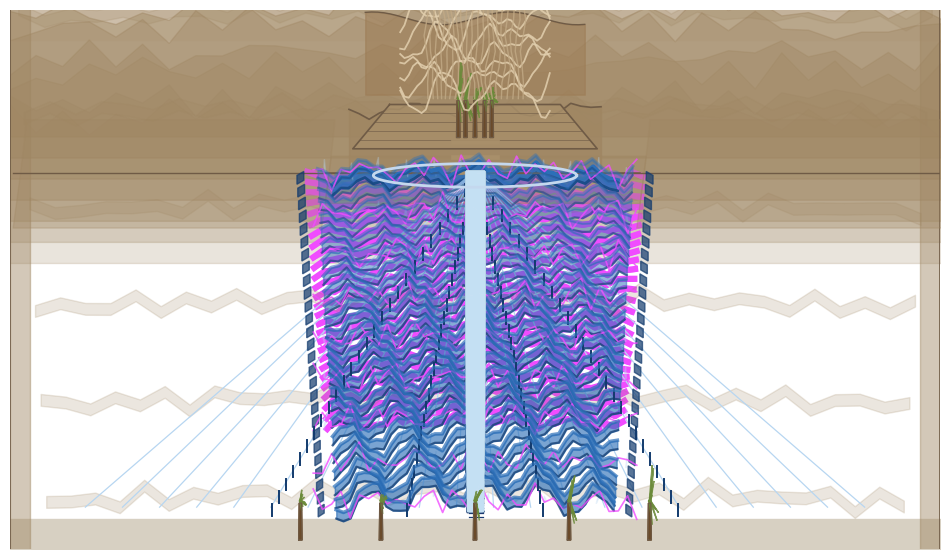

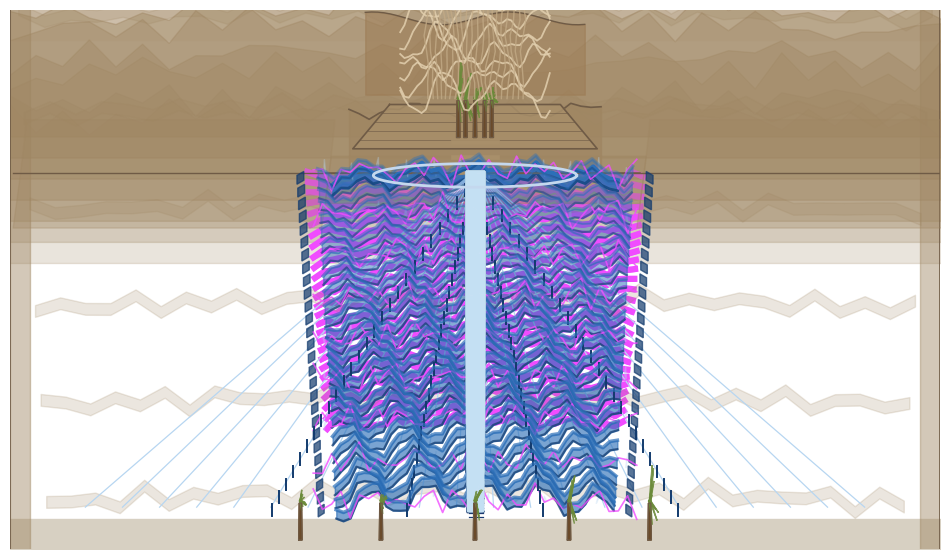

In [118]:
# 4th variation (simple overrides + call)
# Width + pattern adjustments
CENTER_WIDTH = 150
MALL_WIDTH = CENTER_WIDTH * 1.95
MALL_CANYON_TOP_WIDTH = MALL_WIDTH * 1.08
MALL_CANYON_BOTTOM_WIDTH = MALL_WIDTH * 0.82
CANYON_WIDTH = 860
CANYON_OPENING_WIDTH = max(MALL_CANYON_TOP_WIDTH * 0.92, CENTER_WIDTH * 1.3)
SCENE_EXTENT_X = CANYON_WIDTH / 2 - 1

CURVE_AMPLITUDE = 2.4
HOTEL_CURVE_AMPLITUDE = 1.45
MALL_ITERATIONS = 2
RESORT_FLOORS = 9

# Color tweaks (blue mall + bold pattern accents)
TEXTURE_PALETTE.update({
    "resort_main": "#c2a36f",
    "resort_shadow": "#9c7b54",
    "resort_trim": "#e2cfae",
    "resort_accent": "#d9b064",
    "mall_main": "#2c6fb8",
    "mall_accent": "#123a6d",
    "mall_glass": "#b7d6f1",
    "shop_glass": "#c7e3f6",
    "shop_frame": "#1b3b70",
    "shop_sign": "#f04cff",
    "cave": "#9f8662",
    "cave_edge": "#6f5b46",
    "env_floor": "#d7d0c2",
    "env_ceiling": "#f4efe8",
    "palm_trunk": "#6a4a2a",
    "palm_frond": "#6b8a3a"
})

# Distort mall + resort + messy palms (curved distortion)
def _base_curved_y(x, base_y, width, amp):
    return base_y + amp * (1 - (x / (width / 2))**2)

def curved_y(x, base_y, width, amp):
    base = _base_curved_y(x, base_y, width, amp)
    twist = np.sin(x * 0.12 + base_y * 0.2) * (amp * 0.75)
    ripple = np.sin(x * 0.35 + base_y * 0.08) * 0.7
    return base + twist + ripple

def draw_resort_facade(ax, base_y, floors, bays, bay_width, floor_height, color):
    total_width = bays * bay_width
    left, right = -total_width / 2, total_width / 2
    xs = scaled_xs(XS_MED, CENTER_WIDTH * 0.92)
    for f in range(floors):
        y = base_y + f * floor_height
        wobble = np.sin(xs * 0.1 + y * 0.22 + f) * 1.6
        curve_twist = np.sin(xs * 0.16 + f * 1.6) * 1.9
        ys = curved_y(xs, y, CENTER_WIDTH, HOTEL_CURVE_AMPLITUDE * 1.35) + wobble + curve_twist
        ax.plot(xs, ys, color=TEXTURE_PALETTE["resort_trim"], linewidth=1.3, alpha=0.85, zorder=7)
    for x in np.linspace(left, right, 20):
        ys = np.linspace(base_y + 0.4, base_y + floors * floor_height - 0.6, 8)
        jitter = np.sin(ys * 0.6 + x * 0.09) * 1.2
        curve_shear = np.sin(ys * 0.34 + x * 0.16) * 1.6
        ax.plot(x + jitter + curve_shear, ys, color=TEXTURE_PALETTE["resort_window"], linewidth=1.0, alpha=0.8, zorder=7)
    roof_y = base_y + floors * floor_height
    roof_xs = scaled_xs(XS_MED, CENTER_WIDTH * 0.95)
    roof_ys = curved_y(roof_xs, roof_y + 1.2, CENTER_WIDTH, HOTEL_CURVE_AMPLITUDE * 1.2)
    ax.plot(roof_xs, roof_ys, color=TEXTURE_PALETTE["resort_accent"], linewidth=2.2, zorder=7)

def draw_mall_facade(ax, base_y_top, base_y_bottom, width, amp, xs_med, color):
    rows = np.linspace(base_y_bottom + 0.4, base_y_top - 0.3, 9)
    for i, y in enumerate(rows):
        xs = scaled_xs(xs_med, width * 0.9)
        zig = np.sign(np.sin(xs * 0.28 + i * 1.4)) * 1.1
        curve_twist = np.sin(xs * 0.24 + i * 2.1) * 1.5
        ys = curved_y(xs, y, width, amp * 0.55) + zig + curve_twist
        ax.plot(xs, ys, color=TEXTURE_PALETTE["shop_sign"], linewidth=1.2, alpha=0.8, zorder=5)
        for x in np.linspace(-width * 0.42, width * 0.42, 12):
            base = curved_y(x, y, width, amp * 0.45)
            skew = np.sin(x * 0.32 + i) * 1.1
            arc = np.sin(x * 0.25 + i * 1.4) * 1.3
            tri = [(x - 1.1 + skew, base - 0.3 + arc), (x + 1.1 + skew, base + 0.2 - arc), (x + skew * 0.4, base + 1.2 + arc)]
            ax.fill([p[0] for p in tri], [p[1] for p in tri], color=TEXTURE_PALETTE["mall_glass"], alpha=0.28, zorder=4)
    for x in np.linspace(-width * 0.48, width * 0.48, 22):
        ys = np.array([base_y_bottom, base_y_top])
        pxs = perspective_x(np.array([x, x]), ys, courtyard=True)
        ax.plot(pxs, ys, color=color, linewidth=0.9, zorder=4)

def draw_palm_trees(ax, base_y, positions, trunk_h=7.5, frond_h=3.5):
    for i, x in enumerate(positions):
        px = perspective_x(x, base_y, courtyard=True)
        trunk_w = 1.6
        trunk_poly = [
            (px - trunk_w, base_y),
            (px + trunk_w, base_y),
            (px + trunk_w * 0.7, base_y + trunk_h),
            (px - trunk_w * 0.7, base_y + trunk_h)
        ]
        ax.fill([p[0] for p in trunk_poly], [p[1] for p in trunk_poly], color=TEXTURE_PALETTE["palm_trunk"], zorder=6)
        ax.plot([p[0] for p in trunk_poly + [trunk_poly[0]]], [p[1] for p in trunk_poly + [trunk_poly[0]]], color=TEXTURE_PALETTE["cave_edge"], linewidth=0.8, zorder=7)
        for j in range(10):
            angle = -1.0 + j * 0.24 + 0.25 * np.sin(i * 1.5 + j)
            length = frond_h * (0.7 + 0.45 * np.sin(i + j * 0.9)) + 1.4
            dx = np.cos(angle) * length * (1.2 + 0.35 * np.sin(j))
            dy = np.sin(angle) * length * (1.05 + 0.4 * np.cos(i))
            base = (px + np.sin(j + i) * 0.5, base_y + trunk_h + 0.3)
            tip = (base[0] + dx, base[1] + dy)
            left = (base[0] - 0.6 + 0.25 * np.sin(j), base[1] + 0.2)
            right = (base[0] + 0.6 + 0.25 * np.cos(j), base[1] + 0.2)
            ax.fill([left[0], tip[0], right[0]], [left[1], tip[1], right[1]], color=TEXTURE_PALETTE["palm_frond"], alpha=0.85, zorder=6)

fig = render_scene()
fig.savefig("liminal_resort_mall_as_4.png", dpi=300, bbox_inches="tight", pad_inches=0, transparent=False)
display(fig)

## Variation 5

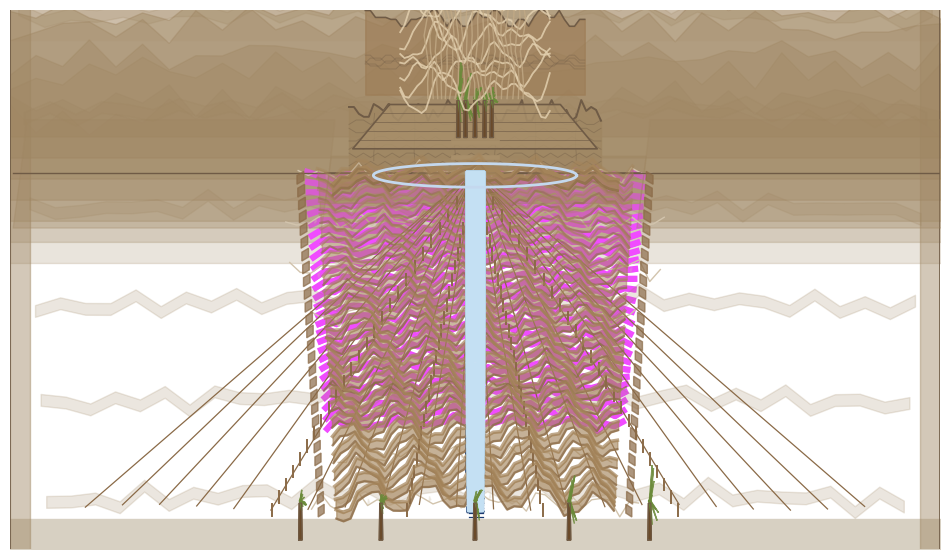

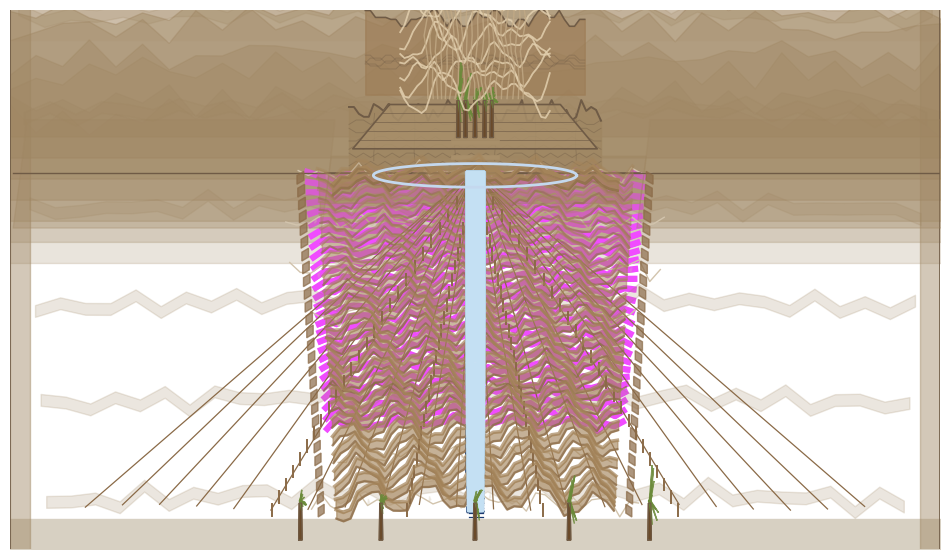

In [119]:
# 5th variation (simple overrides + call)
# Width + pattern adjustments
CENTER_WIDTH = 150
MALL_WIDTH = CENTER_WIDTH * 1.95
MALL_CANYON_TOP_WIDTH = MALL_WIDTH * 1.08
MALL_CANYON_BOTTOM_WIDTH = MALL_WIDTH * 0.82
CANYON_WIDTH = 860
CANYON_OPENING_WIDTH = max(MALL_CANYON_TOP_WIDTH * 0.92, CENTER_WIDTH * 1.3)
SCENE_EXTENT_X = CANYON_WIDTH / 2 - 1

CURVE_AMPLITUDE = 2.4
HOTEL_CURVE_AMPLITUDE = 1.45
MALL_ITERATIONS = 2
RESORT_FLOORS = 9

# Ensure palette exists in this kernel
if "TEXTURE_PALETTE" not in globals():
    TEXTURE_PALETTE = {
        "resort_main": "#c2a36f",
        "resort_shadow": "#9c7b54",
        "resort_trim": "#e2cfae",
        "resort_accent": "#d9b064",
        "mall_main": "#a4845a",
        "mall_accent": "#8a6a47",
        "mall_glass": "#d2c4ad",
        "shop_glass": "#d2c4ad",
        "shop_frame": "#6f5b46",
        "shop_sign": "#d9b064",
        "cave": "#9f8662",
        "cave_edge": "#6f5b46",
        "env_floor": "#d7d0c2",
        "env_ceiling": "#f4efe8",
        "palm_trunk": "#6a4a2a",
        "palm_frond": "#6b8a3a"
    }

# Color tweaks
TEXTURE_PALETTE.update({
    "resort_main": "#c2a36f",
    "resort_shadow": "#9c7b54",
    "resort_trim": "#e2cfae",
    "resort_accent": "#d9b064",
    "mall_main": "#a4845a",
    "mall_accent": "#8a6a47",
    "mall_glass": "#d2c4ad",
    "cave": "#9f8662",
    "cave_edge": "#6f5b46",
    "env_floor": "#d7d0c2",
    "env_ceiling": "#f4efe8",
    "palm_trunk": "#6a4a2a",
    "palm_frond": "#6b8a3a"
})

# Vector-safe perspective helper (handles scalars and arrays)
def perspective_x(x, y, anchor_x=0, vanishing_y=65, strength=0.009, min_scale=0.6, courtyard=False):
    x_arr = np.asarray(x)
    y_arr = np.asarray(y)
    depth = np.maximum(0.0, vanishing_y - y_arr)
    scale = np.maximum(min_scale, 1 - depth * strength)
    px = anchor_x + (x_arr - anchor_x) * scale
    if courtyard:
        px = px + (COURTYARD_VX - px) * np.maximum(0.0, (COURTYARD_VY - y_arr)) * 0.055
    return px

# Environment override with expected signature
def draw_environment(ax, scene_x, y_bottom, y_top, palette):
    floor_top = y_bottom + 6
    floor_front = y_bottom - 4
    ax.fill_between(
        [-scene_x, scene_x],
        y_bottom - 6,
        floor_front,
        color=palette["env_floor"],
        zorder=-2
    )
    ax.fill_between(
        [-scene_x, scene_x],
        floor_front,
        floor_top,
        color=palette["env_floor"],
        zorder=-1
    )
    ax.plot(
        [-scene_x, scene_x],
        [floor_front, floor_front],
        color=palette["cave_edge"],
        linewidth=1.0,
        zorder=-1
    )
    ax.fill_between(
        [-scene_x, scene_x],
        y_top - 6,
        y_top + 12,
        color=palette["env_ceiling"],
        zorder=-1
    )
    ax.fill_betweenx(
        [y_bottom - 8, y_top + 12],
        -scene_x,
        -scene_x + 18,
        color=palette["cave"],
        alpha=0.45,
        zorder=0
    )
    ax.fill_betweenx(
        [y_bottom - 8, y_top + 12],
        scene_x - 18,
        scene_x,
        color=palette["cave"],
        alpha=0.45,
        zorder=0
    )
    ax.plot([-scene_x, -scene_x], [y_bottom - 8, y_top + 12], color=palette["cave_edge"], linewidth=1.2, zorder=1)
    ax.plot([scene_x, scene_x], [y_bottom - 8, y_top + 12], color=palette["cave_edge"], linewidth=1.2, zorder=1)

# Rocky resort layers (sharper, faceted texture to differ from variation 4)
def draw_resort_back_layer(ax, base_y, width, height, palette):
    xs = np.linspace(-width / 2, width / 2, 44)
    steps = 0.9 * np.sign(np.sin(xs * 0.12))
    ridge = base_y + height + steps + 0.7 * np.sign(np.sin(xs * 0.32 + 1.2))
    ax.fill_between(xs, ridge, base_y, color=palette["resort_shadow"], alpha=0.62, zorder=2)
    ax.plot(xs, ridge, color=palette["cave_edge"], linewidth=1.1, zorder=3)
    for i, y_off in enumerate([0.3, 0.9, 1.5, 2.1]):
        jitter = 0.5 * np.sign(np.sin(xs * (0.18 + i * 0.05) + i))
        ax.plot(xs, base_y + height * 0.35 + y_off + jitter, color=palette["cave_edge"], linewidth=0.7, alpha=0.35, zorder=3)

def draw_resort_rock_base(ax, base_y, width, height, palette):
    xs = np.linspace(-width / 2, width / 2, 52)
    jag = (
        1.0 * np.sign(np.sin(xs * 0.2))
        + 0.7 * np.sign(np.sin(xs * 0.46 + 0.9))
        + 0.4 * np.sign(np.sin(xs * 0.9 + 0.3))
    )
    ys = base_y + jag
    ax.fill_between(xs, ys, base_y - height, color=palette["cave"], alpha=0.8, zorder=3)
    ax.plot(xs, ys, color=palette["cave_edge"], linewidth=1.4, zorder=4)
    for i, frac in enumerate(np.linspace(0.2, 0.9, 6)):
        y_strata = base_y - height * frac
        xs_s = np.linspace(-width / 2, width / 2, 36)
        teeth = 0.45 * np.sign(np.sin(xs_s * (0.28 + i * 0.04) + i * 0.7))
        ax.plot(xs_s, y_strata + teeth, color=palette["cave_edge"], linewidth=0.65, alpha=0.4, zorder=4)
    for x0 in np.linspace(-width * 0.4, width * 0.4, 6):
        crack_y = np.linspace(base_y - 0.6, base_y - height * 0.85, 7)
        zig = 0.35 * np.sign(np.sin(crack_y * 0.9 + x0 * 0.12))
        ax.plot(x0 + zig, crack_y, color=palette["cave_edge"], linewidth=0.55, alpha=0.45, zorder=4)

# Unique base-shaped overlay (no extra height)
def draw_mall_facade(ax, base_y_top, base_y_bottom, width, amp, xs_med, color):
    span = max(0.001, base_y_top - base_y_bottom)
    rows = np.linspace(base_y_bottom + 0.35, base_y_top - 0.35, 8)
    for i, y in enumerate(rows):
        t = (y - base_y_bottom) / span
        width_mod = 0.9 - 0.12 * np.sin(t * np.pi * 1.6) + 0.08 * np.cos((t + 0.2) * np.pi * 2.2)
        local_width = width * width_mod
        xs = scaled_xs(xs_med, local_width)
        base_wave = np.sin(xs * 0.22 + base_y_top * 0.08) * (0.7 + 0.5 * np.cos(t * np.pi * 2.4))
        ridge = np.cos(xs * 0.15 - base_y_bottom * 0.05) * (0.35 + 0.4 * np.sin(t * np.pi * 1.2))
        ys = curved_y(xs, y, local_width, amp * 0.45) + base_wave + ridge
        ax.plot(xs, ys, color=color, linewidth=1.0, zorder=4)

        # chevron tiles based on base height
        for x in np.linspace(-local_width * 0.42, local_width * 0.42, 10):
            base = curved_y(x, y, local_width, amp * 0.4)
            tilt = np.sin(x * 0.25 + t * 3.4) * 0.7
            h = 0.9 if i % 2 == 0 else -0.9
            tri = [(x - 0.9 + tilt, base - 0.2), (x + 0.9 + tilt, base + 0.2), (x + tilt * 0.4, base + h)]
            ax.fill([p[0] for p in tri], [p[1] for p in tri], color=TEXTURE_PALETTE["mall_glass"], alpha=0.22, zorder=4)

    for x in np.linspace(-width * 0.48, width * 0.48, 22):
        ys = np.array([base_y_bottom, base_y_top])
        pxs = perspective_x(np.array([x, x]), ys, courtyard=True)
        wobble = np.sin((base_y_top + base_y_bottom) * 0.12 + x * 0.06) * 0.6
        ax.plot(pxs, ys + wobble, color=TEXTURE_PALETTE["mall_accent"], linewidth=0.9, zorder=4)

    # accent band that follows the base profile
    band_y = base_y_bottom + span * 0.35
    band_width = width * (0.86 + 0.06 * np.sin(base_y_bottom * 0.15))
    xs_band = scaled_xs(xs_med, band_width)
    ys_band = curved_y(xs_band, band_y, band_width, amp * 0.45) + np.sin(xs_band * 0.18) * 0.5
    ax.plot(xs_band, ys_band, color=TEXTURE_PALETTE["mall_accent"], linewidth=1.4, alpha=0.75, zorder=5)

fig = render_scene()
fig.savefig("liminal_resort_mall_as_5.png", dpi=300, bbox_inches="tight", pad_inches=0, transparent=False)
display(fig)

## Summary

- Defined three L-system grammars (`tree_grammar`, `koch_grammar`, `desert_grammar`) and validated string expansion.
- Rendered the base resort/mall composition and produced four stylistic variations.
- Saved the outputs as: `liminal_resort_mall.png` and `liminal_resort_mall_as_2.png` through `liminal_resort_mall_as_5.png`.

## References

- https://www.tripadvisor.com/Attraction_Review-g152515-d8382251-Reviews-Patio_Los_Cabos-Cabo_San_Lucas_Los_Cabos_Baja_California.html
- https://www.dunhilltraveldeals.com/hotel-riu-santa-fe-los-cabos
- https://www.touropia.com/cave-hotels-in-cappadocia/
